<a href="https://colab.research.google.com/github/MuthomiTed/Hypothyroid-Predictions/blob/master/Muthomi_Ted_Week_8_Independent_Project_Hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CORE

# INDEPENDENT PROJECT

## .1. Defining the Question

### a) Specifying the Data Analytic Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

> Attain desirable Accuracy 

### c) Understanding the context 

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients

Dataset Columns

Age
Sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medicationthyroid_surgery
query_hypothyroid
query_hyperthyroid
pregnant
sick
tumor
lithium
goitre
TSH_measured
TSH
T3_measured
T3
TT4_measured
TT4

### d) Recording the Experimental Design

> True Experimental Research Design

>

## .2. Reading the Data

### a. Importing Libraries 

#### I. Basic Python Libraries

In [0]:
# Importing IO
import io


# Importing os
import os


# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing researchpy
!pip install researchpy
import researchpy as rp


# Importing scipy from stats
from scipy import stats

# Importing colab files
from google.colab import files

# Importing Matplotlib
import matplotlib.pyplot as plt


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp



from IPython.display import display


# Importing warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



>

#### II. Machine Learning Libraries

In [0]:

from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.utils import resample

from sklearn import svm

from sklearn.datasets import samples_generator

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

from sklearn.pipeline import Pipeline

from collections import Counter

from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


>

### b. Importing Data

In [0]:
uploaded = files.upload()

Saving hypothyroid.csv to hypothyroid.csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['hypothyroid.csv'].decode('utf-8')))

>

## .3. Checking the Data

> DATA SIZE

In [0]:
# Determining the no. of records in our dataset
#

print('The  dataset has ', df.shape[1], ' columns and ', df.shape[0], ' rows!')

The  dataset has  26  columns and  3163  rows!


> TOP ROWS

In [0]:
# Previewing the top of our dataset
#

df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


> BOTTOM ROWS

In [0]:
# Previewing the bottom of our dataset
# 

df.tail(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


> VARIABLE TYPES

In [0]:
# Checking whether each column has an appropriate datatype
#

df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

> VARIABLE'S UNIQUE VALUES

In [0]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in df.columns:
  
  print('\n')
  
  print('COLUMN: ', i, ' \n', 'Unique Values: ',df[i].unique())




COLUMN:  status  
 Unique Values:  ['hypothyroid' 'negative']


COLUMN:  age  
 Unique Values:  ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


COLUMN:  sex  
 Unique Values:  ['M' 'F' '?']


COLUMN:  on_thyroxine  
 Unique Values:  ['f' 't']


COLUMN:  query_on_thyroxine  
 Unique Values:  ['f' 't']


COLUMN:  on_antithyroid_medication  
 Unique Values:  ['f' 't']


COLUMN:  thyroid_surgery  
 Unique Values:  ['f' 't']


COLUMN:  query_hypothyroid  
 Unique Values:  ['f' 't']


COLUMN:  query_hyperthyroid  
 Unique Values:  ['f' 't']


COLUMN:  pregnant  
 Unique Values: 

<font color = 'green'>*OBSERVATION:*

- There exist numerical columns not in their correct format

>

## .4. Tidying the Dataset

> OUTLIERS

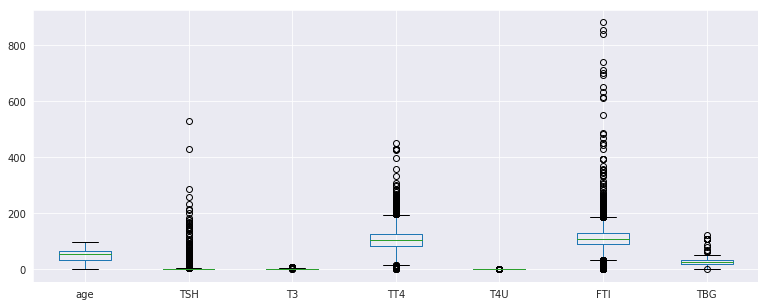

In [0]:
df.boxplot(figsize = (13,5))

plt.show()

<font color = 'green'>*OBSERVATION:*
  
  - FTI, TSH & TT4 variables have outliers
  
  - We shall not remove them at this level as they might hold crucial information

> ANOMALIES

In [0]:
# Checking for Anomalies
#

df.describe(include= 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


> NULL VALUES

 There exists '?' value where data was not collected
 
 To overcome this we shall convert them to null values


In [0]:
df.replace(to_replace='?', value=np.nan, inplace=True, limit=None)

In [0]:
# Identifying existence of missing data in the dataset

df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

<font color = 'green'>*OBSERVATION:*
  
  - We have a huge number of missing values
  
  - Dropping them will result in massive data loss thus we shall perform analysis with them

> REFORMATING DATA TYPES

Columns 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' are numerics yet have been formatted as objects

We shall convert them to numerical columns for analysis

In [0]:
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numeric:
  
  df[[col]] = df[[col]].apply(pd.to_numeric)
  
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

>

## .5. Exploratory Analysis

### a. Univariate Analysis

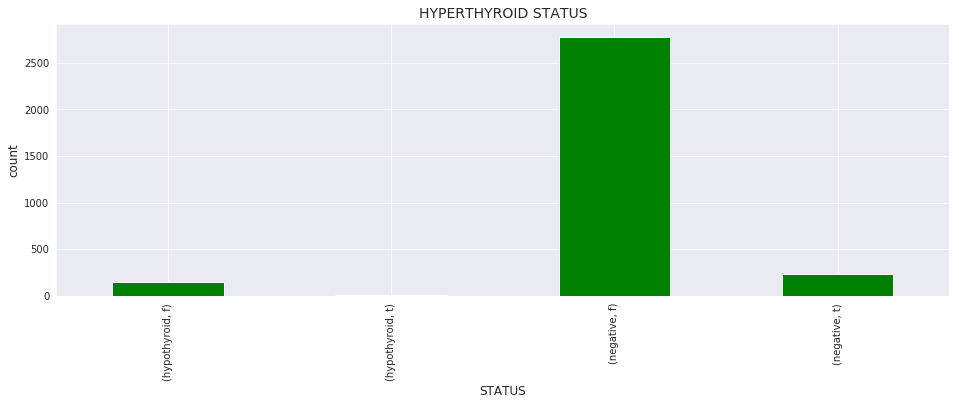

In [0]:
# Ploting the univariate summaries and recording our observations

#
sns.set_style('darkgrid')

df.groupby('status')['query_hyperthyroid'].value_counts().plot.bar(color = 'green',figsize = (16,5))

plt.title('HYPERTHYROID STATUS', fontsize = 14)

plt.xlabel('STATUS', fontsize = 12)

plt.ylabel('count', fontsize = 12)

plt.show()

<font color = 'green'>*OBSERVATION:*
  
  - Majority of patients tested negative for hyperthyroid

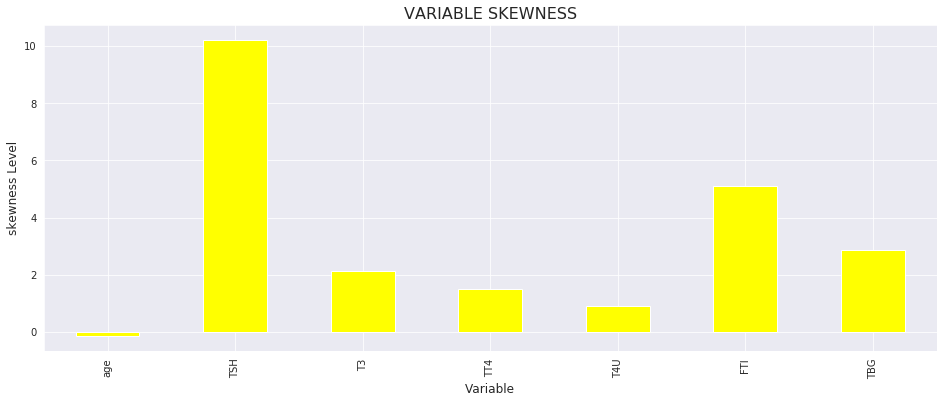

In [0]:
sns.set_style('darkgrid')

df.skew().plot.bar(color = 'yellow',figsize = (16,6))

plt.title('VARIABLE SKEWNESS', fontsize = 16)

plt.xlabel('Variable', fontsize = 12)

plt.ylabel('skewness Level', fontsize = 12)

plt.show()

<font color = 'green'>*OBSERVATION:*
  
  - TSH has the highest skewness

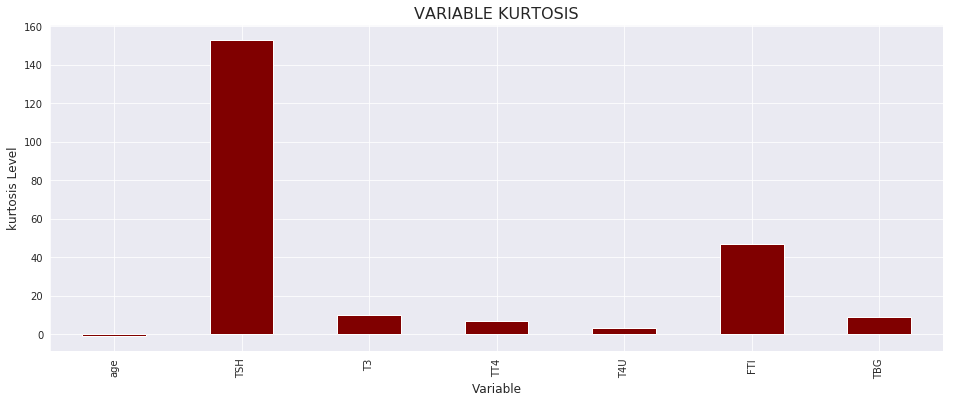

In [0]:
sns.set_style('darkgrid')

df.kurt().plot.bar(color = 'maroon',figsize = (16,6))

plt.title('VARIABLE KURTOSIS', fontsize = 16)

plt.xlabel('Variable', fontsize = 12)

plt.ylabel('kurtosis Level', fontsize = 12)

plt.show()

<font color = 'green'>*OBSERVATION:*
  
  - TSH & FTI have high positive curtosis thus leptocurtic

>

### b. Bivariate Analysis

> CORRELATION

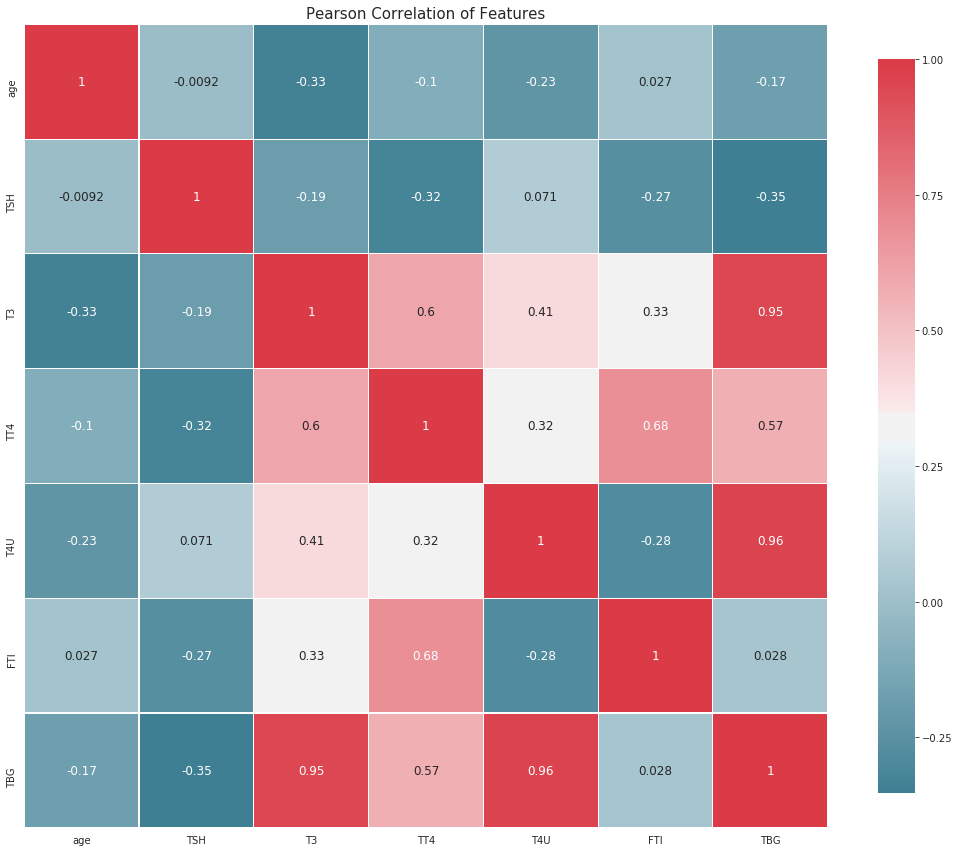

In [0]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(df):
  
    _ , ax = plt.subplots(figsize =(18, 15))
    
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        
        df.corr(), 
        
        cmap = colormap,
        
        square=True, 
        
        cbar_kws={'shrink':.9 }, 
        
        ax=ax,
        
        annot=True, 
        
        linewidths=0.1,vmax=1.0, linecolor='white',
        
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

<font color = 'green'>*OBSERVATION:*
  
  - Majority of columns are negatively correlated
  
  -TBC is highly correlated with T3

> DISTRIBUTION

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


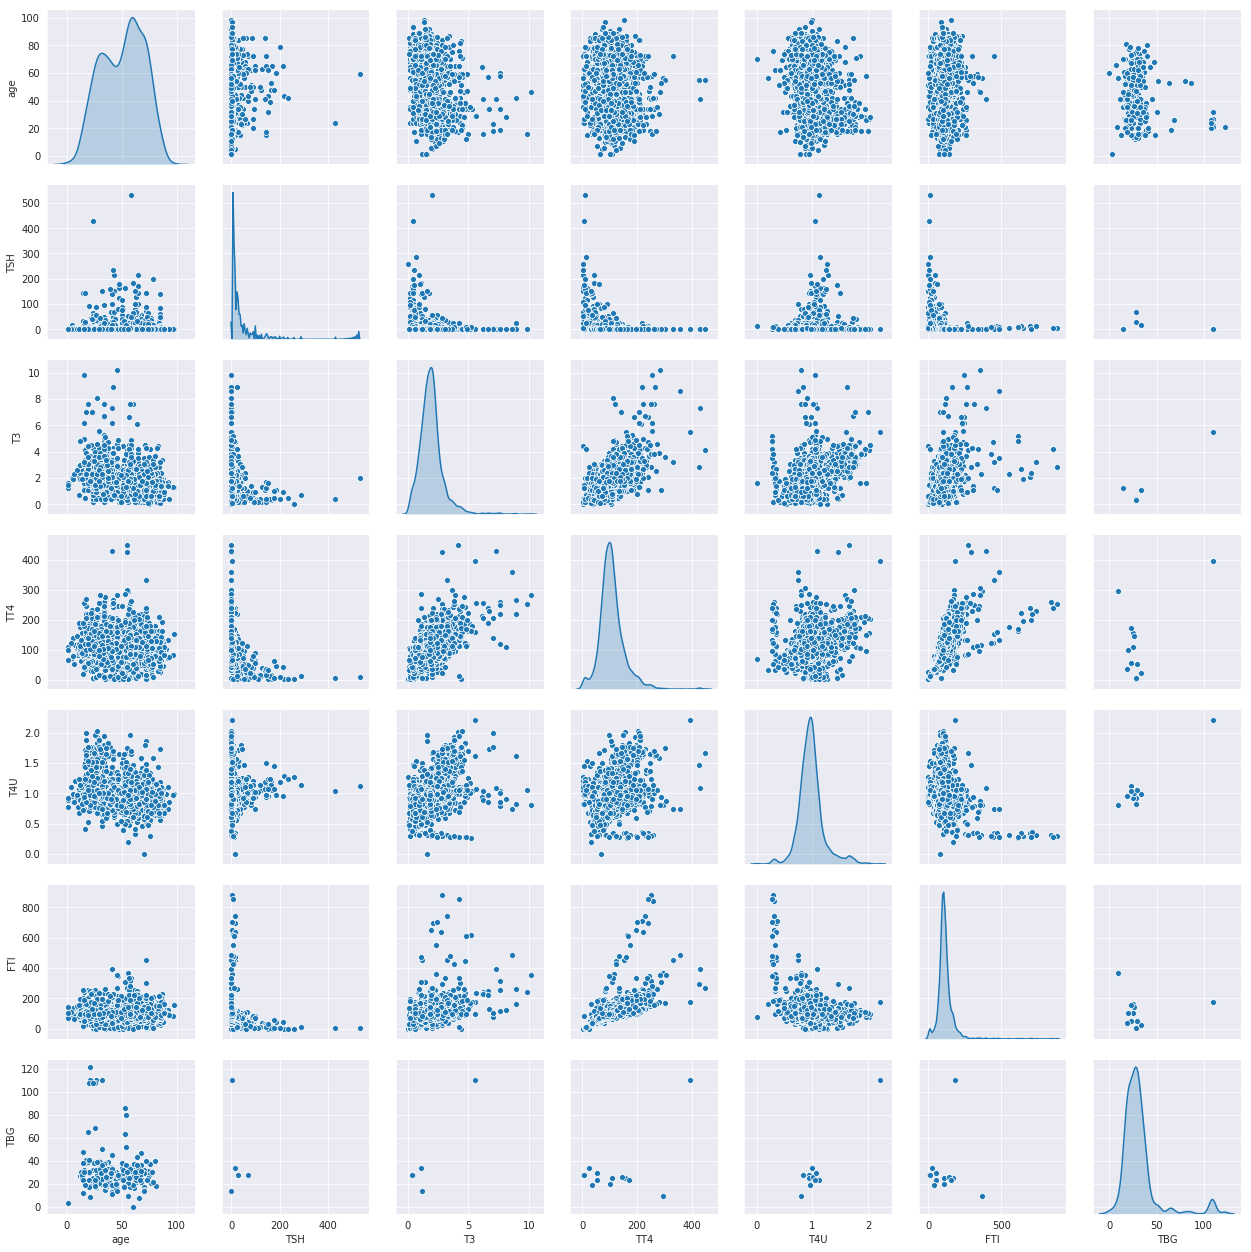

In [0]:
# Crossplots distribution


sns.pairplot(df, diag_kind='kde')


<font color = 'green'>*OBSERVATION:*
  
  - Variables display normal distribution

>

### c. Multivariate Analysis

#### I. Getting Dummies for Categorical columns

In [0]:
# Our dataset has variables whose values are in text format.

# For such values to be represented accurately in our analysis plots we shall asign them numeric representatives


dummy = pd.get_dummies(df[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured', 'TBG_measured']])

dummy.head(2)

,status_hypothyroid,status_negative,sex_?,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [0]:
df['query_hypothyroid'] = df['query_hypothyroid'].map({'f': 0, 't':1})

In [0]:
# We shall then merge dummy values to our dataframe

df = pd.concat([df,dummy],axis = 1)

>

#### II. Splitting Data Target & Feature sets

In [0]:
# Selecting the columns to be used as data for accuracy testing

cols = [col for col in df.columns if col  in ['status_hypothyroid', 'status_negative', 'sex_?', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hyperthyroid_f', 'query_hyperthyroid_t', 'pregnant_f',
       'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t', 'lithium_f',
       'lithium_t', 'goitre_f', 'goitre_t', 'TSH_measured_n', 'TSH_measured_y',
       'T3_measured_n', 'T3_measured_y', 'TT4_measured_n', 'TT4_measured_y',
       'T4U_measured_n', 'T4U_measured_y', 'FTI_measured_n', 'FTI_measured_y',
       'TBG_measured_n', 'TBG_measured_y']]
                                                   
      

X = df[cols]


#assigning the target column

y = df['query_hypothyroid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


>

## .6. Modeling

### a. Random Forest Model

In [0]:
components = {}

for i in np.arange(1, len(X.columns)+1):
  
  
  # Training and Making Predictions
  
  # The random forest classification classifier has been used to make predictions.
  
  from sklearn.ensemble import RandomForestRegressor
  
  classifier = RandomForestRegressor(random_state = 0)
  
  classifier.fit(X_train, y_train)
  
  
  # Predicting the Test set results
  
  y_pred = classifier.predict(X_test)
  
  
  # Performing evaluation
  
  from sklearn.metrics import confusion_matrix
  
  from sklearn.metrics import accuracy_score
  
  y_pred = np.round(y_pred)
  
  cm = confusion_matrix(y_test, y_pred)
  
  acc = accuracy_score(y_test, y_pred)
  
  
  print(cm)
  
  print(acc)
  
components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})

components

[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.9114857744994731
[[863   6]
 [ 78   2]]
0.911485774

{'n_components 37': 'accuracy 91.14857744994731'}

> FEATURE IMPORTANCE

In [0]:
importance =  pd.DataFrame({'Variables: ' : X.columns,'Coefficient' : classifier.feature_importances_})
importance

,Variables:,Coefficient
0,status_hypothyroid,0.004582
1,status_negative,0.059779
2,sex_?,0.034646
3,sex_F,0.064882
4,sex_M,0.043381
5,on_thyroxine_f,0.039205
6,on_thyroxine_t,0.120842
7,query_on_thyroxine_f,0.004964
8,query_on_thyroxine_t,0.005178
9,on_antithyroid_medication_f,0.005684


> TREE VISUALIZATION

In [0]:
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO

from IPython.display import Image

import pydotplus

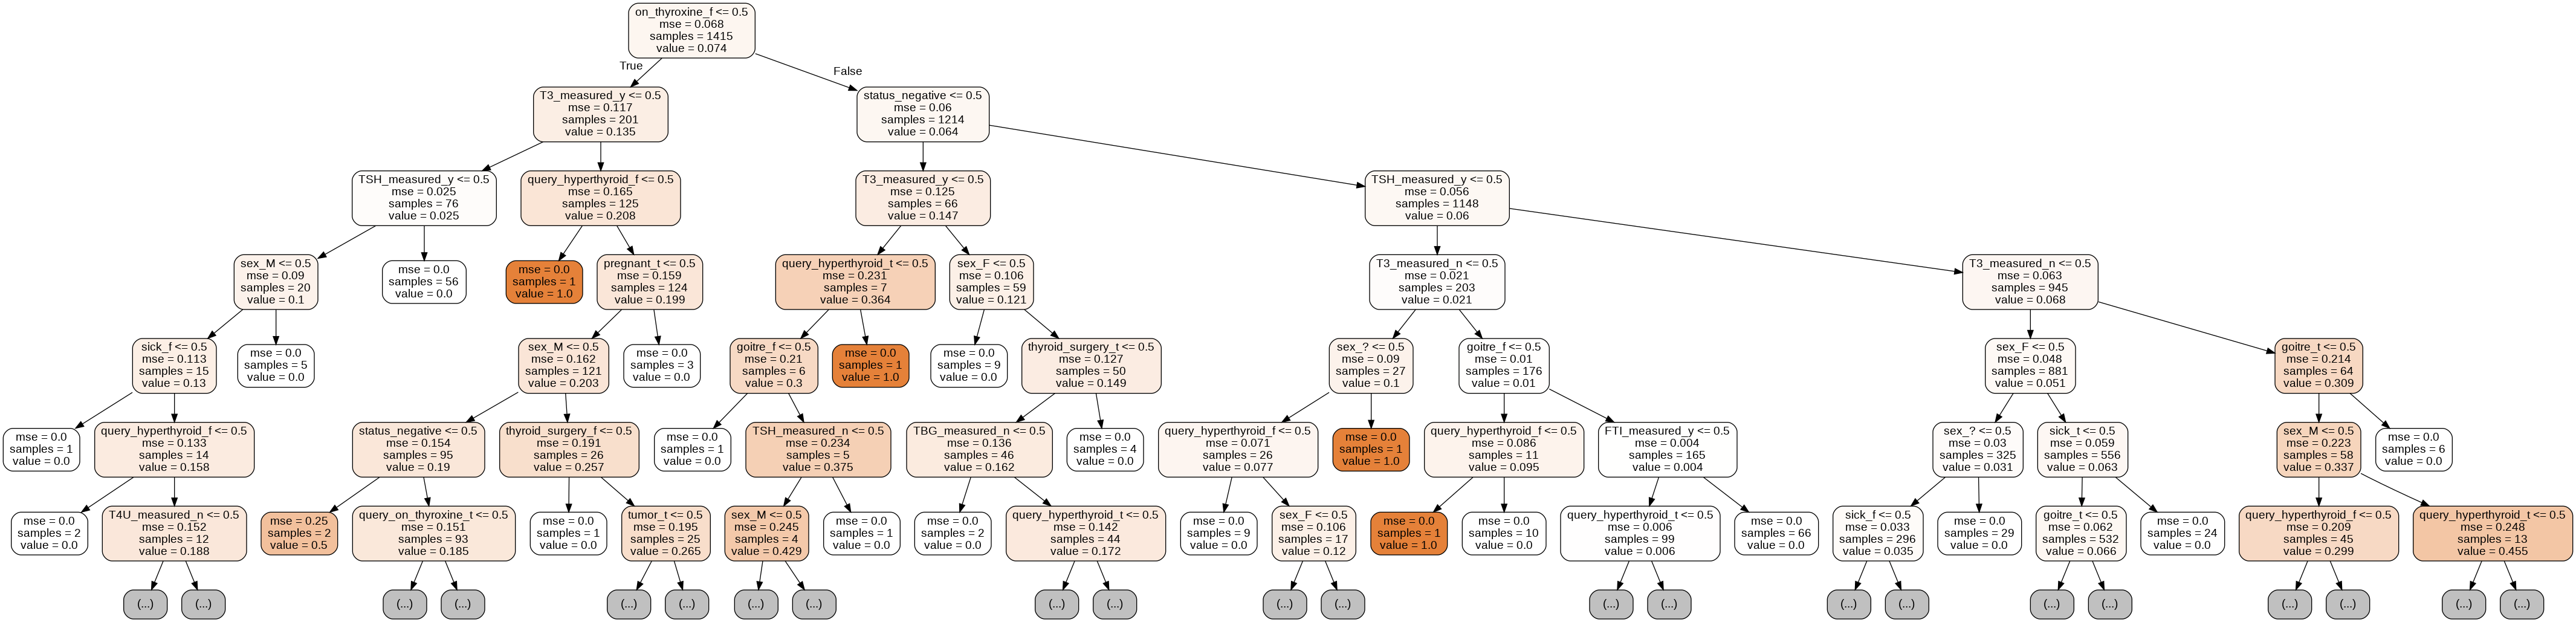

In [0]:
dot_data = StringIO()

tree = classifier.estimators_[6]

export_graphviz(tree, max_depth = 6, feature_names = X.columns, filled = True,out_file = dot_data, rounded  = True, class_names = ['false', 'true'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('hypothyroid.png')

Image(graph.create_png())

>

### b. Fitting S.V.M. Models

In [0]:
from sklearn.svm import SVC,LinearSVC

from sklearn import model_selection


#listing the models i shall use then append them to a list

models = []

models.append(('Polynormial', SVC(kernel='poly') ))

models.append(('Radial Basis Function', SVC(kernel='rbf')))

models.append(('Linear', SVC(kernel='linear')))

models.append(('Sigmoid', SVC(kernel='sigmoid')))

#model evaluation

results = []

names = []

for name, model in models:
  
  kfold = model_selection.KFold(n_splits=3, random_state=0)
  
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  results.append(cv_results)
  
  names.append(name)
  
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  
  print(msg)

Polynormial: 0.927281 (0.009279)
Radial Basis Function: 0.927281 (0.009279)
Linear: 0.927281 (0.009279)
Sigmoid: 0.927281 (0.009279)


<font color = 'green'>*OBSERVATION:*
  
  - The accuracy did not change for the svm models

>

### c. Tuning SVM 

#### I. Linear

In [118]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

svm.coef_

array([[ 0.00071778, -0.12940096, -0.1096559 ,  0.03052701, -0.04955429,
        -0.097516  , -0.03116718, -0.03589987, -0.09278332,  0.07408594,
        -0.20276913, -0.04239265, -0.08629053, -0.08419525, -0.04448793,
        -0.00132754, -0.12735565,  0.02061992, -0.1493031 ,  0.03815335,
        -0.16683654, -0.12868318,  0.        , -0.00834993, -0.12033325,
        -0.14193508,  0.0132519 , -0.00691544, -0.12176775, -0.10346165,
        -0.02522153,  0.00316467, -0.13184785,  0.00316467, -0.13184785,
         0.06238288, -0.19106606]])

In [119]:
acc = accuracy_score(y_test, pred)
  
print(acc)
  

0.9157007376185459


>

#### II. Radial basis function (rbf)

In [0]:
from sklearn.svm import SVC


In [0]:
# Building the model 

rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set

rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [0]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9157007376185459
[[869   0]
 [ 80   0]]


>

#### III. Polymomial function

In [0]:
# Building the model 

polyclassifier = SVC(kernel='poly',degree=3)

# Training the model using the training set

polyclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# making prediction

y_pred = polyclassifier.predict(X_test)

In [0]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9157007376185459
[[869   0]
 [ 80   0]]


>

### .7. Challenging the solution

In [0]:
#predicting with xgboost

model = XGBClassifier()

model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# Calculating Feature Importance

print(model.feature_importances_)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

[0.06460045 0.         0.04714632 0.0861521  0.         0.06727901
 0.         0.01847039 0.         0.06516238 0.         0.01662069
 0.         0.04028529 0.         0.01984759 0.         0.08503298
 0.         0.0631424  0.         0.         0.         0.0510896
 0.         0.11184179 0.         0.08781704 0.         0.08230505
 0.         0.         0.         0.05899085 0.         0.03421602
 0.        ]


,importance
feature,
TSH_measured_n,0.112
T3_measured_n,0.088
sex_F,0.086
sick_f,0.085
TT4_measured_n,0.082
on_thyroxine_f,0.067
status_hypothyroid,0.065
on_antithyroid_medication_f,0.065
tumor_f,0.063


In [0]:
# make predictions for test data

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

In [0]:
# Model Accuracy

model.score(X, y)

0.9238065128042997

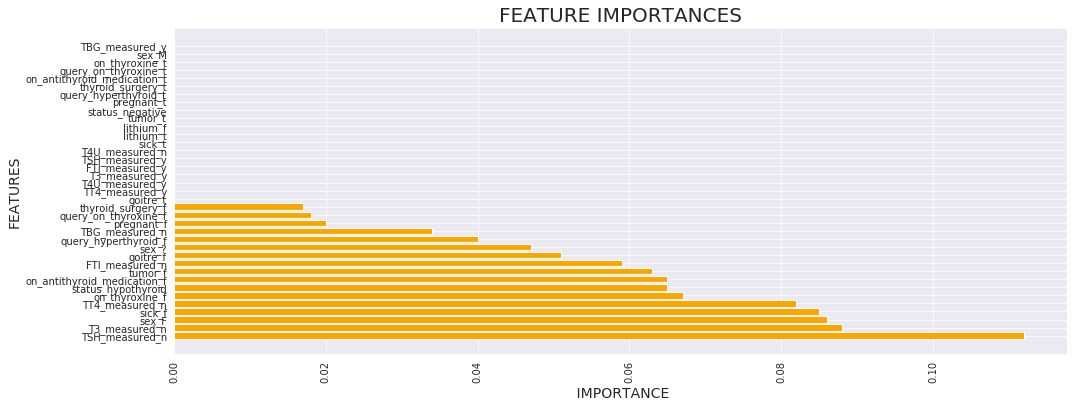

In [0]:
# Feature Importance Visualization


plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.barh(importances.index, importances.importance,color = 'orange')

plt.title('FEATURE IMPORTANCES', fontsize = 20)

plt.xlabel(' IMPORTANCE', fontsize = 14,)

plt.xticks(rotation = 90)

plt.ylabel('FEATURES', fontsize = 14)

plt.show()

>

## Conclusion

> THE MODELS PERFORMED OPTIMUMLY AFTER TUNING